## 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [4]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [5]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. 이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

* pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.
* 참고 : 슬라이드에서 중심극한정리를 찾아보세요.

In [7]:
# 전체 데이터셋의 'TotalPrice' 열의 평균과 표준편차 계산
population_mean = df['TotalPrice'].mean()
population_std = df['TotalPrice'].std()

#1000개 추출
sample = df.sample(n=1000, random_state=42)

# 추출된 표본의 'TotalPrice' 열의 평균과 표준편차 계산
sample_mean = sample['TotalPrice'].mean()
sample_std = sample['TotalPrice'].std()

# 결과 출력
print("Population Mean:", population_mean)
print("Population Standard Deviation:", population_std)
print("Sample Mean:", sample_mean)
print("Sample Standard Deviation:", sample_std)

Population Mean: 17.98779487699964
Population Standard Deviation: 378.8108235059747
Sample Mean: 16.832069999999998
Sample Standard Deviation: 64.46732773087356


## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [8]:
from scipy.stats import ttest_ind

# 'TotalPrice'와 'Country' 컬럼 확인
print(df[['TotalPrice', 'Country']].head())

#주문이 많은 두 국가 선택
# 국가별 주문 건수 계산
country_orders = df['Country'].value_counts()

# 상위 두 국가 선택
top_countries = country_orders.head(2)
print("Top two countries with most orders:")
print(top_countries)

# 상위 두 국가의 데이터 추출
country1_data = df[df['Country'] == top_countries.index[0]]['TotalPrice']
country2_data = df[df['Country'] == top_countries.index[1]]['TotalPrice']

# 독립표본 t-검정 수행
t_statistic, p_value = ttest_ind(country1_data, country2_data, equal_var=False)

# 결과 출력
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# 각 국가의 'TotalPrice' 평균 계산
mean_country1 = country1_data.mean()
mean_country2 = country2_data.mean()

print("Mean TotalPrice for", top_countries.index[0] + ":", mean_country1)
print("Mean TotalPrice for", top_countries.index[1] + ":", mean_country2)

   TotalPrice         Country
0       15.30  United Kingdom
1       20.34  United Kingdom
2       22.00  United Kingdom
3       20.34  United Kingdom
4       20.34  United Kingdom
Top two countries with most orders:
United Kingdom    495478
Germany             9495
Name: Country, dtype: int64
t-statistic: -10.046360185819829
p-value: 9.823416115791871e-24
Mean TotalPrice for United Kingdom: 16.525065419655366
Mean TotalPrice for Germany: 23.348942601369142


In [ ]:
#1종 오류는 귀무가설이 참일 때 우리가 그것을 잘못 기각하는 확률을 나타내며, 2종 오류는 귀무가설이 거짓일 때 우리가 그것을 잘못 채택하는 확률을 나타냅니다.

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

* 참고 : [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* 참고 : 슬라이드의 "기술 통계" 부분을 찾아보세요.

In [9]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

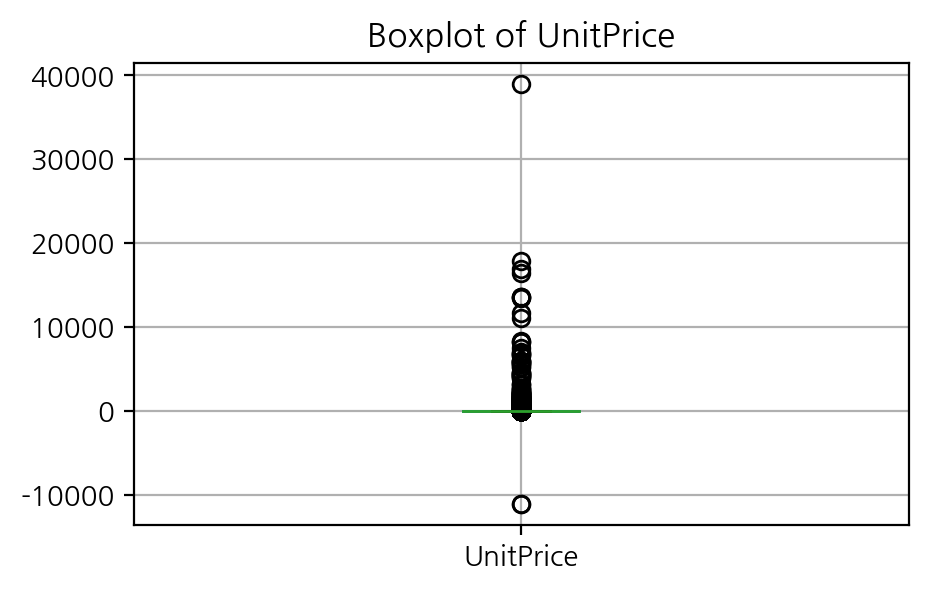

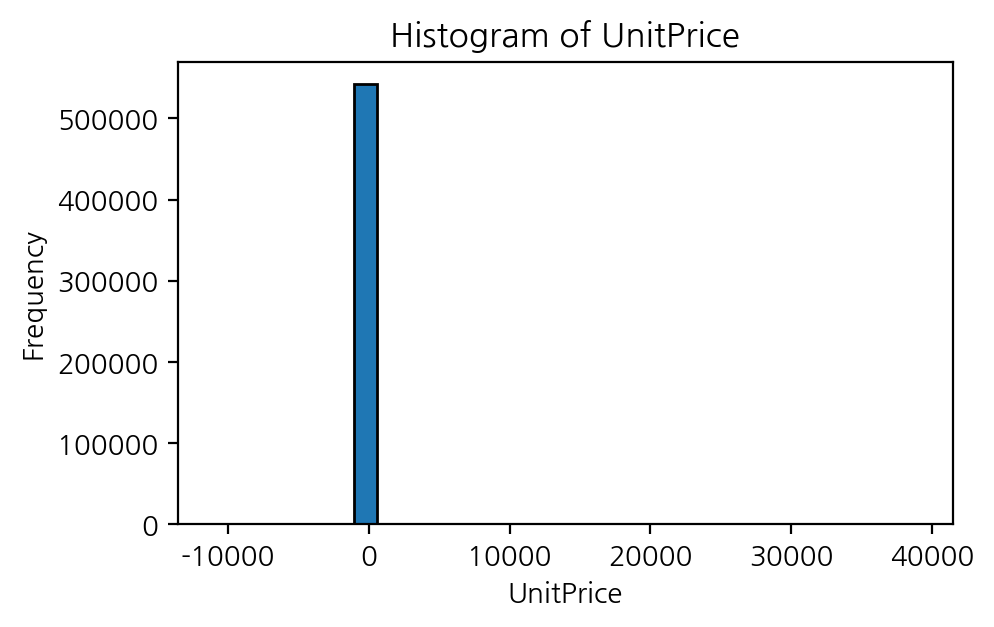

Quantiles:
0.25    1.25
0.50    2.08
0.75    4.13
Name: UnitPrice, dtype: float64
Mean: 4.611113626088516
Median: 2.08
Standard Deviation: 96.75985306117938
Variance: 9362.469164421025


In [10]:
import matplotlib.pyplot as plt

# 주중과 주말 데이터 병합
data = pd.concat([weekday_data, weekend_data])

# 상자수염그림
plt.figure(figsize=(5, 3))
data.boxplot(column='UnitPrice')
plt.title('Boxplot of UnitPrice')
plt.show()

# 히스토그램
plt.figure(figsize=(5, 3))
plt.hist(data['UnitPrice'], bins=30, edgecolor='black')
plt.title('Histogram of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

# 데이터 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산) 계산
quantiles = data['UnitPrice'].quantile([0.25, 0.5, 0.75])
mean = data['UnitPrice'].mean()
median = data['UnitPrice'].median()
std_dev = data['UnitPrice'].std()
variance = data['UnitPrice'].var()

print("Quantiles:")
print(quantiles)
print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Variance:", variance)


## 미션4)  'TotalPrice'의 중간값이 특정 값과 다른지 검증하기 위해 비모수 검정 (예: 맨-휘트니 U-검정)을 사용하세요. 검증 결과에 대해 비즈니스 관점에서 분석해 주세요.

* 비모수 검정은 데이터가 정규 분포를 따르지 않거나, 정규 분포에 대한 가정을 할 수 없을 때 사용됩니다. 특히, 작은 표본 크기, 이상치의 존재, 순위나 순서와 같은 비정량적 데이터에 적합합니다. 또한, 두 그룹 간의 중앙값이나 분포의 형태가 다를 때 비모수 검정을 사용할 수 있습니다.

* 맨-휘트니 U-검정은 두 독립적인 표본 간에 중앙값의 차이를 비교하는 데 사용됩니다. 이 검정은 두 그룹의 데이터가 서로 독립적이며, 최소한 서열 척도로 측정되어야 합니다. 데이터의 분포 형태에 대한 가정이 필요 없으며, 크기가 다른 두 표본에 대해서도 사용할 수 있습니다. 이 검정은 데이터의 중앙값이 특정 값과 다른지 여부를 검증하는 데 유용합니다.

다음의 주어진 코드를 활용해 주세요.

```python
from scipy.stats import mannwhitneyu
# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
```

* 참고 : https://www.ibm.com/docs/ko/spss-statistics/beta?topic=tests-mann-whitney-u-test

In [11]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 검정할 중간값
median_to_test = 100

# 중간값 검정
statistic, p_value = mannwhitneyu(df['TotalPrice'], [median_to_test])

# 결과 출력
print("Statistic:", statistic)
print("p-value:", p_value)

Statistic: 13564.5
p-value: 0.09988195255333811


In [10]:
#분석 결과 p-값이 유의수준보다 작다면, 'TotalPrice'의 중간값이 특정 값과 다르다고 할 수 있습니다. 이는 해당 중간값을 기준으로 한 특정한 비즈니스 의사 결정을 할 때 유용한 정보일 수 있습니다. 예를 들어, 특정 가격대의 제품을 판매하는 데 그 가격대가 예상보다 높거나 낮을 경우, 이를 특정 값과의 비교를 통해 적절한 조치를 취할 수 있습니다.

## 미션5) UnitPrice 컬럼에 대한 95% 신뢰구간을 구하고  seaborn 으로 신뢰구간을 시각화 해주세요. 그리고 이 신뢰구간이 비즈니스 결정에 어떻게 활용될 수 있는지 설명하세요.

In [ ]:
confidence_interval = stats.norm.interval(0.95, loc=np.mean(df['UnitPrice']), scale=stats.sem(df['UnitPrice']))

print("95% Confidence Interval for UnitPrice:", confidence_interval)

# Seaborn을 사용하여 신뢰구간 시각화
sns.histplot(df['UnitPrice'], kde=True)
plt.axvline(confidence_interval[0], color='red', linestyle='--', label='Lower CI')
plt.axvline(confidence_interval[1], color='red', linestyle='--', label='Upper CI')
plt.legend()
plt.title('95% Confidence Interval for UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

95% Confidence Interval for UnitPrice: (4.353493309684596, 4.8687339424924305)
